# 2024 White Sox 21 game Loss Streak
<img src="img/win_loss_streaks.png"></img>
<img src="img/win_loss_streaks2.png"></img>
- https://x.com/octonion/status/1820709177511096522
- https://x.com/octonion/status/1820857993996693624
- https://x.com/octonion/status/1820862423219212581

In [15]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def simulate_season(win_percentage, num_games=162):
    season = []
    current_streak = 0
    longest_losing_streak = 0
    
    for _ in range(num_games):
        if random.random() < win_percentage:
            season.append(1)  # Win
            current_streak = 0
        else:
            season.append(0)  # Loss
            current_streak += 1
            longest_losing_streak = max(longest_losing_streak, current_streak)
    
    return longest_losing_streak

def monte_carlo_simulation(win_percentage, num_seasons=10000, num_games=162):
    losing_streaks = []
    
    for _ in range(num_seasons):
        losing_streaks.append(simulate_season(win_percentage, num_games))
    
    return losing_streaks


## Simulation


Simulation Results for 0.250 win percentage:
Average longest losing streak: 14.45 games
Median longest losing streak: 14.00 games
Maximum longest losing streak: 52 games
Percentage of seasons with 21+ game losing streak: 8.69%


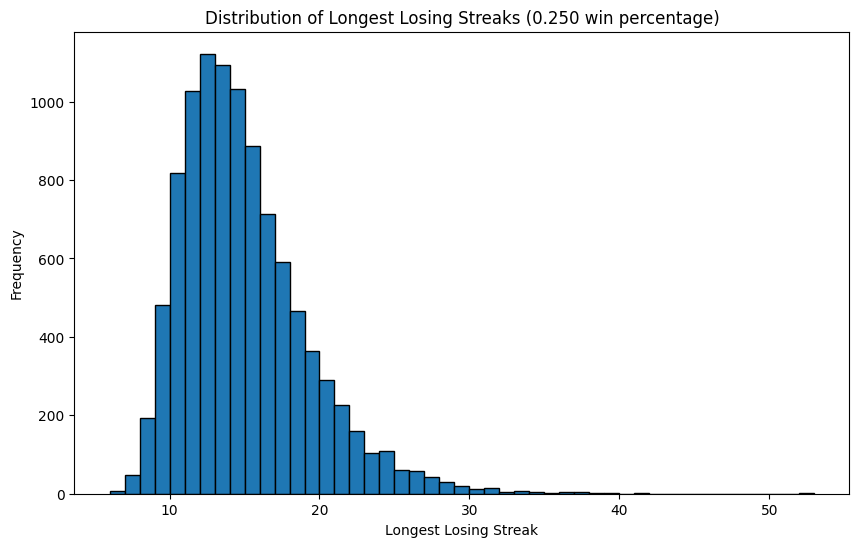

In [6]:
# Input win percentage
win_percentage = .25

# Run simulation
results = monte_carlo_simulation(win_percentage)

# Calculate statistics
avg_longest_streak = np.mean(results)
median_longest_streak = np.median(results)
max_longest_streak = np.max(results)

seasons_with_long_streak = sum(streak >= 21 for streak in results)
percentage_long_streak = (seasons_with_long_streak / len(results)) * 100

print(f"\nSimulation Results for {win_percentage:.3f} win percentage:")
print(f"Average longest losing streak: {avg_longest_streak:.2f} games")
print(f"Median longest losing streak: {median_longest_streak:.2f} games")
print(f"Maximum longest losing streak: {max_longest_streak} games")
print(f"Percentage of seasons with 21+ game losing streak: {percentage_long_streak:.2f}%")


plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(min(results), max(results) + 2, 1), edgecolor='black')
plt.title(f"Distribution of Longest Losing Streaks ({win_percentage:.3f} win percentage)")
plt.xlabel("Longest Losing Streak")
plt.ylabel("Frequency")
plt.show()

## Theoretical

In [7]:
# Parameters
win_probability = 0.25
loss_probability = 1 - win_probability
streak_length = 21
season_length = 162

# Calculation
probability_streak = loss_probability ** streak_length
possible_starting_points = season_length - streak_length + 1
uncorrected_expectation = probability_streak * possible_starting_points

# Apply correction factor
corrected_expectation = uncorrected_expectation / 4

print(f"Probability of a {streak_length}+ game losing streak in a {season_length}-game season:")
print(f"Uncorrected expectation: {uncorrected_expectation:.6f}")
print(f"Corrected expectation: {corrected_expectation:.6f}")
print(f"Expected occurrence: Once every {1/corrected_expectation:.1f} seasons")

Probability of a 21+ game losing streak in a 162-game season:
Uncorrected expectation: 0.337734
Corrected expectation: 0.084434
Expected occurrence: Once every 11.8 seasons


## Markov Chain


In [20]:
def create_transition_matrix(loss_probability, num_states):
    T = np.zeros((num_states, num_states))
    
    # Fill the transition matrix
    for i in range(num_states - 1):
        T[i, 0] = 1 - loss_probability  # Probability of winning (reset to 0 losses)
        T[i, i + 1] = loss_probability  # Probability of losing (move to next state)
    
    # Make the last state (21 losses) absorbing
    T[-1, -1] = 1
    
    return T

# Parameters
win_probability = 0.25
loss_probability = 1 - win_probability
num_states = 22  # 0 to 21 losses
season_length = 162

# Create transition matrix
T = create_transition_matrix(loss_probability, num_states)

# Raise the matrix to the power of number of games
T_final = np.linalg.matrix_power(T, season_length)

# Probability of reaching 21-loss streak (last state) starting from 0 losses
probability = T_final[0, -1]

print(f"Probability of a 21+ game losing streak in a {season_length}-game season:")
print(f"(for a team with {win_probability:.3f} win probability)")
print(f"Estimated probability: {probability:.8f}")
print(f"Expected occurrence: Once every {1/probability:.1f} seasons")

Probability of a 21+ game losing streak in a 162-game season:
(for a team with 0.250 win probability)
Estimated probability: 0.08356010
Expected occurrence: Once every 12.0 seasons


# 2017 Cleveland Indians 22 game Winning Streak
<img src="img/win_loss_streaks3.png"></img>
- https://x.com/octonion/status/908817073459138561
- https://x.com/StatsbyLopez/status/908822855038709761

In [8]:
def simulate_season_winning_streak(win_percentage, num_games=162):
    current_streak = 0
    longest_winning_streak = 0
    
    for _ in range(num_games):
        if random.random() < win_percentage:
            current_streak += 1
            longest_winning_streak = max(longest_winning_streak, current_streak)
        else:
            current_streak = 0
    
    return longest_winning_streak

def monte_carlo_winning_streaks(win_percentage, num_seasons=10000, num_games=162):
    winning_streaks = []
    
    for _ in range(num_seasons):
        winning_streaks.append(simulate_season_winning_streak(win_percentage, num_games))
    
    return winning_streaks


## Simulation



Simulation Results for 0.552 win percentage:
Probability of a 22+ game winning streak: 0.0001
Expected occurrence: Once every 8333.3 seasons


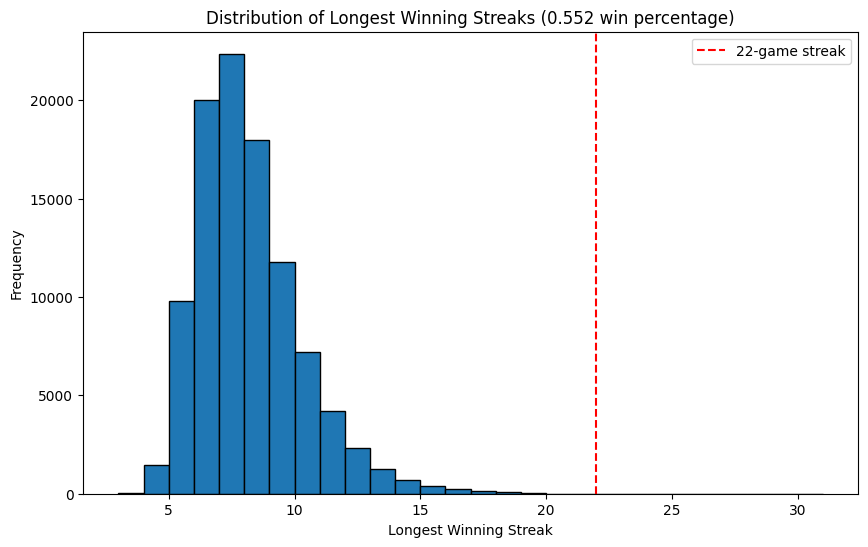

In [14]:
# Input parameters
win_percentage = 0.552
target_streak = 22
num_seasons = 100000

# Run simulation
results = monte_carlo_winning_streaks(win_percentage, num_seasons)

# Calculate probability
seasons_with_target_streak = sum(streak >= target_streak for streak in results)
probability = seasons_with_target_streak / num_seasons

print(f"\nSimulation Results for {win_percentage:.3f} win percentage:")
print(f"Probability of a {target_streak}+ game winning streak: {probability:.4f}")
print(f"Expected occurrence: Once every {1/probability:.1f} seasons")

plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(min(results), max(results) + 2, 1), edgecolor='black')
plt.title(f"Distribution of Longest Winning Streaks ({win_percentage:.3f} win percentage)")
plt.xlabel("Longest Winning Streak")
plt.ylabel("Frequency")
plt.axvline(x=target_streak, color='r', linestyle='--', label=f'{target_streak}-game streak')
plt.legend()
plt.show()

## Theoretical


In [16]:
# Parameters
win_probability = 0.552
streak_length = 22
season_length = 162

# Calculation
probability_streak = win_probability ** streak_length
possible_starting_points = season_length - streak_length + 1
uncorrected_expectation = probability_streak * possible_starting_points

# Apply correction factor
corrected_expectation = uncorrected_expectation / (1 / (1 - win_probability))

print(f"Probability of a {streak_length}+ game winning streak in a {season_length}-game season:")
print(f"Uncorrected expectation: {uncorrected_expectation:.8f}")
print(f"Corrected expectation: {corrected_expectation:.8f}")
print(f"Expected occurrence: Once every {1/corrected_expectation:.1f} seasons")

Probability of a 22+ game winning streak in a 162-game season:
Uncorrected expectation: 0.00029640
Corrected expectation: 0.00013279
Expected occurrence: Once every 7530.8 seasons


## Markov Chain

In [18]:
def american_to_probability(odds):
    if odds > 0:
        return 100 / (odds + 100)
    else:
        return abs(odds) / (abs(odds) + 100)

odds_list = [147, -140, -163, -220, -107, 116, 132, -300, -170, -165, -200, -160, -157, -140, -170, -130, -130, -230, -185, -135, -110, -170]

# Convert odds to probabilities
probabilities = [american_to_probability(odd) for odd in odds_list]

# Calculate overall probability
overall_probability = math.prod(probabilities)

# Convert to percentage
percentage_chance = overall_probability * 100


print(f"\nChance of winning all bets: {overall_probability:.8f}")
print(f"Percentage chance of winning all bets: {percentage_chance:.6f}%")

# Calculate the odds of this occurring
if percentage_chance < 50:
    odds_of_occurring = (100 / percentage_chance) - 1
    print(f"Odds of this occurring: 1 in {odds_of_occurring:.2f}")
else:
    odds_of_occurring = 100 / (100 - percentage_chance) - 1
    print(f"Odds of this occurring: {odds_of_occurring:.2f} to 1")


Chance of winning all bets: 0.00000769
Percentage chance of winning all bets: 0.000769%
Odds of this occurring: 1 in 129985.82


In [21]:
def create_transition_matrix_win(win_probability, num_states):
    T = np.zeros((num_states, num_states))
    
    # Fill the transition matrix
    for i in range(num_states - 1):
        T[i, 0] = 1 - win_probability  # Probability of losing (reset to 0 wins)
        T[i, i + 1] = win_probability  # Probability of winning (move to next state)
    
    # Make the last state (22 wins) absorbing
    T[-1, -1] = 1
    
    return T

# Parameters
win_probability = 0.552
num_states = 23  # 0 to 22 wins
num_games = 162

# Create transition matrix
T = create_transition_matrix_win(win_probability, num_states)

# Raise the matrix to the power of number of games
T_final = np.linalg.matrix_power(T, num_games)

# Probability of reaching 22-win streak (last state) starting from 0 wins
probability = T_final[0, -1]

print(f"Probability of a 22+ game winning streak in a 162-game season:")
print(f"(for a team with {win_probability:.3f} win probability)")
print(f"Estimated probability: {probability:.8f}")
print(f"Expected occurrence: Once every {1/probability:.1f} seasons")

Probability of a 22+ game winning streak in a 162-game season:
(for a team with 0.552 win probability)
Estimated probability: 0.00013394
Expected occurrence: Once every 7466.0 seasons
